# Deep Learning - Hidden Layers

## Why do we stack layers 
(adapted from http://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute)

Let's call the input vector $x$, the hidden layer activations $h$, and the output activation $y$.  You have some function $f$ that maps from $x$ to $h$ and another function $g$ that maps from $h$ to $y$.  

So the hidden layer's activation is $f(x)$ and the output of the network is $g(f(x))$.

**Why have two functions ($f$ and $g$) instead of just one?**

If the level of complexity per function is limited, then $g(f(x))$ can compute things that $f$ and $g$ can't do individually.  

------

**An example with logical functions:**

For example, if we only allow $f$ and $g$ to be simple logical operators like "AND", "OR", and "NAND", then you can't compute other functions like "XOR" with just one of them.  On the other hand, we *could* compute "XOR" if we were willing to layer these functions on top of each other: 

First layer functions:

* Make sure that at least one element is "TRUE" (using OR)
* Make sure that they're not all "TRUE" (using NAND)

Second layer function:

* Make sure that both of the first-layer criteria are satisfied (using AND)

The network's output is just the result of this second function.  The first layer *transforms the inputs* into something that the second layer can use so that the whole network can perform XOR.

----

**An example with images:**

Slide 61 from [this talk](http://cs.nyu.edu/~fergus/tutorials/deep_learning_cvpr12/CVPR2012-Tutorial_lee.pdf) as a single image--shows (one way to visualize) what the different hidden layers in a particular neural network are looking for.

![cnn](nn.png)

The first layer looks for short pieces of edges in the image: these are very easy to find from raw pixel data, but they're not very useful by themselves for telling you if you're looking at a face or a bus or an elephant.

The next layer composes the edges: if the edges from the bottom hidden layer fit together in a certain way, then one of the eye-detectors in the middle of left-most column might turn on.  It would be hard to make a single layer that was so good at finding something so specific from the raw pixels: eye detectors are much easier to build out of edge detectors than out of raw pixels.

The next layer up composes the eye detectors and the nose detectors into faces.  In other words, these will light up when the eye detectors and nose detectors from the previous layer turn on with the right patterns.  These are very good at looking for particular kinds of faces: if one or more of them lights up, then your output layer should report that a face is present.

This is useful because **face detectors are easy to build out of eye detectors and nose detectors, but really hard to build out of pixel intensities.**

So each layer gets you farther and farther from the raw pixels and closer to your ultimate goal (e.g. face detection or bus detection).

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets('./', one_hot=True)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [2]:
x, y = mnist.train.next_batch(20)

In [3]:
x.shape

(20, 784)

In [4]:
y.shape

(20, 10)

In [5]:
y

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

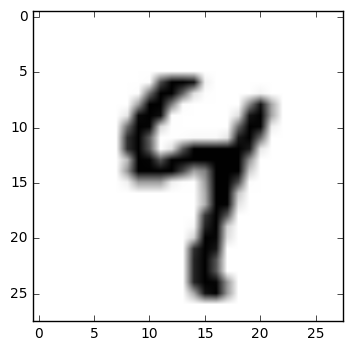

In [6]:
plt.imshow(x[2].reshape((28,28)),cmap='Greys')
plt.show()

In [7]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b

y_true = tf.placeholder(tf.float32,[None, 10])

#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_ = sess.run([cross_entropy, train_step], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0:
        print('loss: '+str(l))

loss: 2.30258
loss: 0.389749
loss: 0.485583
loss: 0.222426
loss: 0.302407
loss: 0.339425
loss: 0.427828
loss: 0.261605
loss: 0.349465
loss: 0.341301


In [8]:
# test the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.919


In [9]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

0: loss: 2.30258 accuracy: 0.101562
10: loss: 0.835407 accuracy: 0.765625
20: loss: 0.721602 accuracy: 0.765625
30: loss: 0.542871 accuracy: 0.890625
40: loss: 0.546278 accuracy: 0.8125
50: loss: 0.475845 accuracy: 0.84375
60: loss: 0.491323 accuracy: 0.882812
70: loss: 0.405811 accuracy: 0.898438
80: loss: 0.368217 accuracy: 0.890625
90: loss: 0.426121 accuracy: 0.890625
100: loss: 0.329369 accuracy: 0.921875
200: loss: 0.34812 accuracy: 0.898438
300: loss: 0.28303 accuracy: 0.921875
400: loss: 0.286543 accuracy: 0.898438
500: loss: 0.328168 accuracy: 0.875
600: loss: 0.329068 accuracy: 0.898438
700: loss: 0.422757 accuracy: 0.890625
800: loss: 0.263065 accuracy: 0.945312
900: loss: 0.249577 accuracy: 0.953125


## Hidden Layered Network

In [10]:
def fully_conntected_activation(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.sigmoid(tf.matmul(input,W)+b)
    
    return activation

def fully_conntected(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.matmul(input,W)+b
    
    return activation

In [11]:
x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32,[None, 10])

hidden = fully_conntected_activation(x,784,100)
output = fully_conntected(hidden,100,10)
# output = fully_conntected(x,784,10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=output))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# test the model
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], 
                     feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

0: loss: 2.35349 accuracy: 0.117188
10: loss: 1.96051 accuracy: 0.195312
20: loss: 1.66182 accuracy: 0.507812
30: loss: 1.35439 accuracy: 0.640625
40: loss: 0.985635 accuracy: 0.820312
50: loss: 0.930737 accuracy: 0.804688
60: loss: 0.802722 accuracy: 0.828125
70: loss: 0.883047 accuracy: 0.742188
80: loss: 0.628144 accuracy: 0.84375
90: loss: 0.532518 accuracy: 0.898438
100: loss: 0.528091 accuracy: 0.875
200: loss: 0.462773 accuracy: 0.875
300: loss: 0.289088 accuracy: 0.9375
400: loss: 0.321214 accuracy: 0.90625
500: loss: 0.360746 accuracy: 0.882812
600: loss: 0.261743 accuracy: 0.945312
700: loss: 0.356142 accuracy: 0.921875
800: loss: 0.182996 accuracy: 0.945312
900: loss: 0.361883 accuracy: 0.929688


In [12]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.932
